- Introduction (Text Representation / Feature extraction from text / text
vectorization)
- Text to Vector Conversion 
    - Bag of Words
    - Tf-Idf
    - OHE
    - N-Gram (Bag of N-Grams)
    - Custom Features
    - Word2Vec (Embedding)

# 1. OneHot Encoding (OHE)

- Corpus (c) --> Total number of words
- Vocaulary (v) --> Unique words in corpus
- Document (d) --> Each review is Document
- Word (w) --> Each word in document

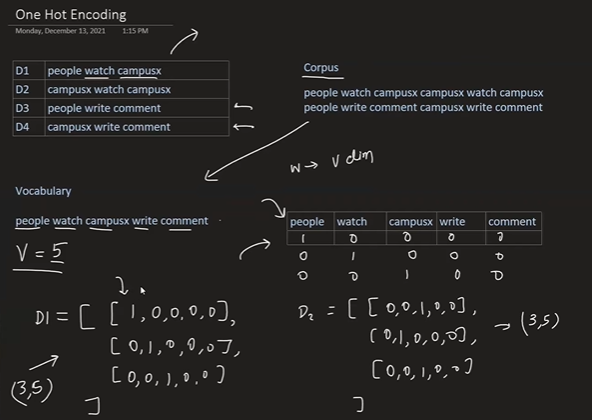

- Pros
    - easy to intutive
    - easy to implement
- Cons
    - sparsity 
    - Overfitting
    - may be variable input size
    - Out of vocabulary
    - No capturing of semantic meaning

# 2. Bag of Words

Used in text classification

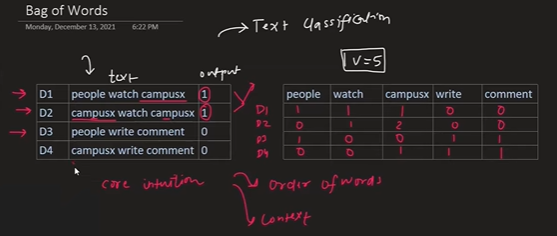

- Pros
    - simple and intutive
    - fixed size
    - little bit capture of semantic meaning
- Cons
    - sparsity
    - out of vocabulary
    - not consider ordering is an issue
    - negation of any sentence is very close to original sentence

### Code Implementation

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.DataFrame({'text':['people watch campusx','campusx watch campusx','people write comment','campusx write comment'],'output':[1,1,0,0]})
df

,text,output
0,people watch campusx,1
1,campusx watch campusx,1
2,people write comment,0
3,campusx write comment,0


In [3]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [4]:
bow=cv.fit_transform(df['text'])

In [5]:
print(cv.vocabulary_)

{'people': 2, 'watch': 3, 'campusx': 0, 'write': 4, 'comment': 1}


In [6]:
print(bow[0].toarray())
print(bow[1].toarray())

[[1 0 1 1 0]]
[[2 0 0 1 0]]


In [7]:
cv.transform(['campusx watch and write comment of campusx']).toarray()

array([[2, 1, 0, 1, 1]], dtype=int64)

# 3. N-Grams

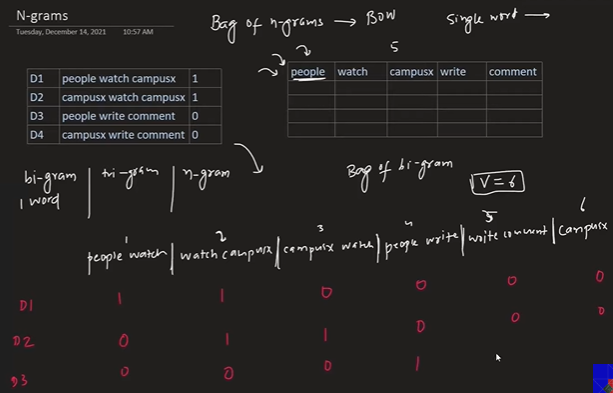

- Pros
    - vector distance increase
    - able to capture semantic meaning of sentence
    - easy to implement
- Cons
    - dimension of vocabulary increase
    - slow down the algo
    - Out of Vocabulary

### Code Implementation

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.DataFrame({'text':['people watch campusx','campusx watch campusx','people write comment','campusx write comment'],'output':[1,1,0,0]})
df

,text,output
0,people watch campusx,1
1,campusx watch campusx,1
2,people write comment,0
3,campusx write comment,0


In [4]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(ngram_range=(2,2))
# if ngram_range=(1,2) then it is combination of unigram and bigram
# and if ngram_range=(4,4) through an error here
# if ngram_range=(1,3) then print(len(cv.vocabulary_))==15

In [5]:
bow=cv.fit_transform(df['text'])

In [6]:
print(cv.vocabulary_)

{'people watch': 2, 'watch campusx': 4, 'campusx watch': 0, 'people write': 3, 'write comment': 5, 'campusx write': 1}


# 4. Tf-Idf

provide a value of each word such that a particular word has high occurance in particular document but rare in whole corpus.
Value is calculate as:
- Tf = Term Frequency
- Idf = Inverse Document Frequency
- Tf X Idf

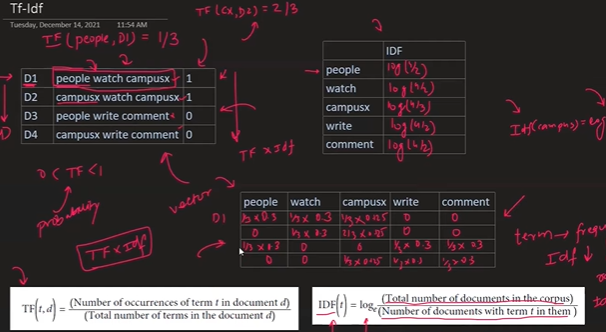

- Pros
    - Used in information retrieval system (eg. search engine)
- Cons
    - Sparsity
    - Out of Vocabulary
    - High dimension (hence overfitting)
    - Not capture semantic relationship

### Code Implementation

In [7]:
import pandas as pd
import numpy as np

In [8]:
df=pd.DataFrame({'text':['people watch campusx','campusx watch campusx','people write comment','campusx write comment'],'output':[1,1,0,0]})
df

,text,output
0,people watch campusx,1
1,campusx watch campusx,1
2,people write comment,0
3,campusx write comment,0


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
tfidf.fit_transform(df['text']).toarray()

array([[0.49681612, 0.        , 0.61366674, 0.61366674, 0.        ],
       [0.8508161 , 0.        , 0.        , 0.52546357, 0.        ],
       [0.        , 0.57735027, 0.57735027, 0.        , 0.57735027],
       [0.49681612, 0.61366674, 0.        , 0.        , 0.61366674]])

In [10]:
print(tfidf.idf_)
print(tfidf.get_feature_names_out())

[1.22314355 1.51082562 1.51082562 1.51082562 1.51082562]
['campusx' 'comment' 'people' 'watch' 'write']


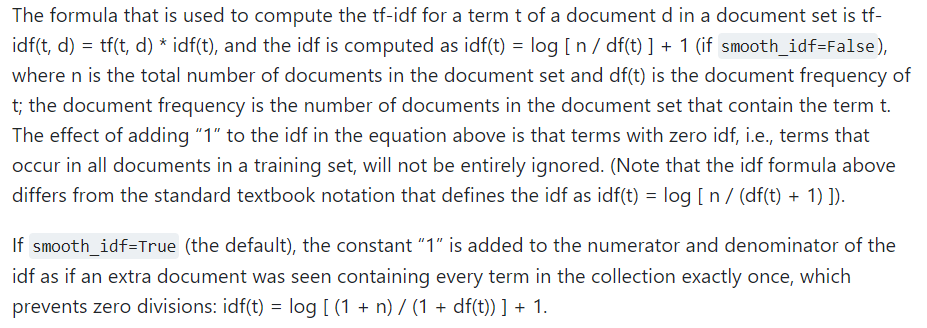

Interview Question:
- Why we take log at time of calculation of IDF ?